In [2]:
from ultralytics import YOLO
import torch

model = YOLO('yolo11n.pt')

results = model.train(
    data='data.yaml',
    epochs=50,
    imgsz=640,
    batch=8,
    project='lep_project', 
    name='yolo11n',
    device=torch.device('cpu'),
    # exit_ok=True
)

engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolo11n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=lep_project, rect=False, resume=False, retina_ma

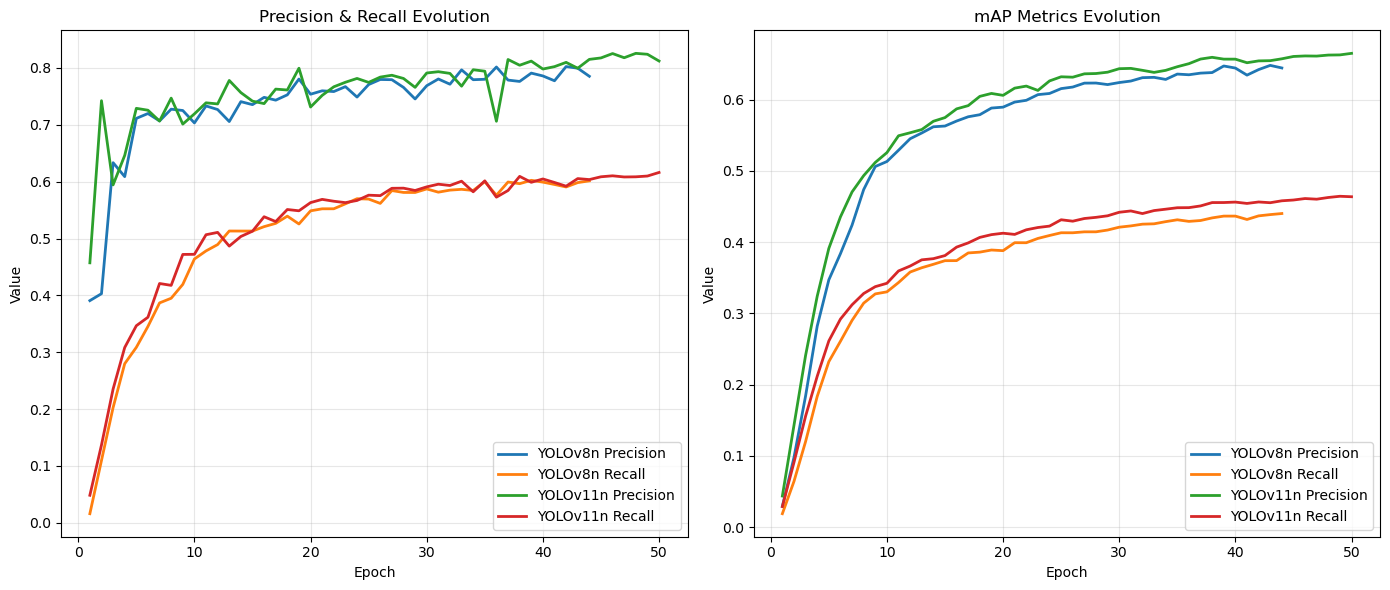

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_yolo8n = pd.read_csv('/home/stasevich/CV/jupiter/LEP/runs/detect/lep_project/yolo8n/results.csv')
df_yolo11n = pd.read_csv('/home/stasevich/CV/jupiter/LEP/runs/detect/lep_project/yolo11n/results.csv')

df_yolo8n.columns = [c.strip() for c in df_yolo8n.columns]
epochs_yolo8n = df_yolo8n['epoch']
df_yolo11n.columns = [c.strip() for c in df_yolo11n.columns]
epochs_yolo11n = df_yolo11n['epoch']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_yolo8n, df_yolo8n['metrics/precision(B)'], label='YOLOv8n Precision', lw=2)
plt.plot(epochs_yolo8n, df_yolo8n['metrics/recall(B)'], label='YOLOv8n Recall', lw=2)
plt.plot(epochs_yolo11n, df_yolo11n['metrics/precision(B)'], label='YOLOv11n Precision', lw=2)
plt.plot(epochs_yolo11n, df_yolo11n['metrics/recall(B)'], label='YOLOv11n Recall', lw=2)
plt.title('Precision & Recall Evolution')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(epochs_yolo8n, df_yolo8n['metrics/mAP50(B)'], label='YOLOv8n Precision', lw=2)
plt.plot(epochs_yolo8n, df_yolo8n['metrics/mAP50-95(B)'], label='YOLOv8n Recall', lw=2)
plt.plot(epochs_yolo11n, df_yolo11n['metrics/mAP50(B)'], label='YOLOv11n Precision', lw=2)
plt.plot(epochs_yolo11n, df_yolo11n['metrics/mAP50-95(B)'], label='YOLOv11n Recall', lw=2)
plt.title('mAP Metrics Evolution')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [2]:
def print_result(metrics, name_model):
    print("\n" + "="*30)
    print(f'ФИНАЛЬНЫЕ МЕТРИКИ ({name_model})')
    print("="*30)
    print(f"Precision: {metrics.box.mp:.4f}")
    print(f"Recall:    {metrics.box.mr:.4f}")
    print(f"mAP@50:    {metrics.box.map50:.4f}")
    print(f"mAP@50-95: {metrics.box.map:.4f}")
    print("="*30)

In [1]:
from ultralytics import YOLO

# 1. Загружаем именно ЛУЧШУЮ модель
model_yolo8n = YOLO('/home/stasevich/CV/jupiter/LEP/runs/detect/lep_project/yolo8n/weights/best.pt')
model_yolo11n = YOLO('/home/stasevich/CV/jupiter/LEP/runs/detect/lep_project/yolo11n/weights/best.pt')

metrics_yolo8n = model_yolo8n.val(data='data.yaml', split='test')
metrics_yolo11n = model_yolo11n.val(data='data.yaml', split='test')







Ultralytics 8.4.7 🚀 Python-3.10.19 torch-2.9.1 CPU (AMD Ryzen 5 5600U with Radeon Graphics)
Model summary (fused): 73 layers, 3,007,208 parameters, 0 gradients
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 317.9±188.5 MB/s, size: 684.1 KB)
val: Scanning /home/stasevich/CV/jupiter/LEP/dataset/test/labels.cache... 736 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 736/736 140.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 46/46 1.6s/it 1:141.8sss
                   all        736       3944      0.794       0.54      0.603      0.409
      vibration_damper        189        499      0.729      0.557      0.621      0.398
    festoon_insulators        681       1732      0.727      0.702      0.772      0.537
    polymer_insulators        400        806      0.753      0.819      0.839      0.629
              traverse          2          2          1          0          0          0
                  nest  

In [5]:
print_result(metrics_yolo8n, 'YOLOv8n')
print_result(metrics_yolo11n, 'YOLOv11n')


ФИНАЛЬНЫЕ МЕТРИКИ (YOLOv8n)
Precision: 0.7937
Recall:    0.5403
mAP@50:    0.6033
mAP@50-95: 0.4086

ФИНАЛЬНЫЕ МЕТРИКИ (YOLOv11n)
Precision: 0.7986
Recall:    0.5545
mAP@50:    0.6112
mAP@50-95: 0.4202
